# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [ ]:
!pip install pymongo

In [ ]:
!pip install pymongo[srv]

In [ ]:
!pip install dnspython

In [ ]:
!pip install tweepy

In [ ]:
!pip install twitter

## Import Python libraries

In [1]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [3]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secret']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secret']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [5]:
client = MongoClient(mongod_connect)
db = client.gp19 # use or create a database named demo
tweet_collection = db.lab10 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [6]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [7]:
track = ['covid19'] # define the keywords, tweets contain election

#locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [8]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1327434236408696832
1327434238312923136
1327434239407779840
1327434239994777602
1327434241278357505
1327434241987252225
1327434243991977985
1327434244650627072
1327434244977795075
1327434245137178626
1327434245313339392
1327434245393014784
1327434245648867334
1327434246466666498
1327434247783661569
1327434249394413569
1327434249218166786
1327434250891780096
1327434251994853377
1327434252410114048
1327434252569415688
1327434254234501122
1327434254507241472
1327434256029716480
1327434257820684289
1327434260437938176
1327434260530290694
1327434260861607938
1327434262002352130
1327434262954598407
1327434264372256769
1327434264523190273
1327434265861050369
1327434267815763968
1327434267702550529
1327434268084236288
1327434268255997952
1327434269115998209
1327434269216608257
1327434269493497856
1327434272379170817
1327434273750732800
1327434277072605186
1327434278007869440
1327434278263795712
1327434278976688128
1327434279501131777
1327434279945707520
1327434282034409474
1327434281971576832


1327434585152442368
1327434585467203587
1327434587035885568
1327434587270750209
1327434587316891648
1327434587878940673
1327434588759621634
1327434589590216704
1327434590223360001
1327434591154606081
1327434591116931072
1327434591712395264
1327434591804805126
1327434591527788571
1327434594145153026
1327434595709710336
1327434596007374848
1327434596288323584
1327434597563592705
1327434598662479878
1327434600600260609
1327434600927408128
1327434603263614976
1327434603850829825
1327434604219834373
1327434605444673538
1327434606895882240
1327434607877304322
1327434608313589761
1327434609131474946
1327434609479520256
1327434610255400960
1327434610741899264
1327434611010523137
1327434613246013440
1327434613850042369
1327434615028666369
1327434615137644546
1327434616567963648
1327434616349683712
1327434619986337792
1327434621840224258
1327434622028845061
1327434622754557952
1327434622779744266
1327434622691463168
1327434623048060929
1327434623387885568
1327434625237610501
1327434627141816320


1327434931648294914
1327434932638027777
1327434935276167169
1327434935234334720
1327434935725137921
1327434935955648513
1327434936601640960
1327434935636955136
1327434937104908289
1327434937985867776
1327434940112363520
1327434942360530950
1327434944876933120
1327434944939900928
1327434946013696001
1327434948228374528
1327434948769353728
1327434949109149698
1327434951160188928
1327434951277637632
1327434951810232321
1327434951344590848
1327434952544296960
1327434954234425345
1327434954901426176
1327434955035701249
1327434955282997248
1327434956633726978
1327434957262884865
1327434959431348224
1327434959355691008
1327434959771066368
1327434961209749504
1327434962921005057
1327434963348754433
1327434964552589312
1327434966423244801
1327434967052324864
1327434967501197312
1327434968331677696
1327434970210582528
1327434971053744128
1327434971129257986
1327434972010057733
1327434973004013568
1327434972865712129
1327434973901709312
1327434975000600576
1327434975701037057
1327434976393113601


1327435261853061120
1327435262167838723
1327435262826201090
1327435262964719616
1327435263874789376
1327435264285925376
1327435267754532865
1327435268295593988
1327435268358627331
1327435269172301830
1327435271147761664
1327435274553610240
1327435274993983488
1327435275480526850
1327435275849625600
1327435276797566977
1327435280467582977
1327435280735846400
1327435281742573569
1327435283248377856
1327435283395014661
1327435285693681664
1327435285798371328
1327435287992135684
1327435288277262336
1327435289384501251
1327435289590001664
1327435289967685633
1327435291343380482
1327435291670450176
1327435292375216128
1327435292916281345
1327435293197295617
1327435292551233541
1327435293968924673
1327435293973213184
1327435296384937985
1327435297051746304
1327435297873924096
1327435299450974208
1327435299434205191
1327435299396399106
1327435301137027072
1327435301560741891
1327435301489434625
1327435302756085761
1327435307105587202
1327435307646595072
1327435307789107206
1327435310666559488


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [9]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [10]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [11]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Sat Nov 14 02:20:30 +0000 2020'
'Sat Nov 14 02:20:30 +0000 2020'
'Sat Nov 14 02:20:30 +0000 2020'
'Sat Nov 14 02:20:30 +0000 2020'
'Sat Nov 14 02:20:29 +0000 2020'
'Sat Nov 14 02:20:29 +0000 2020'
'Sat Nov 14 02:20:29 +0000 2020'
'Sat Nov 14 02:20:29 +0000 2020'
'Sat Nov 14 02:20:29 +0000 2020'
'Sat Nov 14 02:20:28 +0000 2020'
'Sat Nov 14 02:20:27 +0000 2020'
'Sat Nov 14 02:20:27 +0000 2020'
'Sat Nov 14 02:20:27 +0000 2020'
'Sat Nov 14 02:20:27 +0000 2020'
'Sat Nov 14 02:20:26 +0000 2020'
'Sat Nov 14 02:20:26 +0000 2020'
'Sat Nov 14 02:20:26 +0000 2020'
'Sat Nov 14 02:20:26 +0000 2020'
'Sat Nov 14 02:20:25 +0000 2020'
'Sat Nov 14 02:20:25 +0000 2020'
'Sat Nov 14 02:20:25 +0000 2020'
'Sat Nov 14 02:20:24 +0000 2020'
'Sat Nov 14 02:20:24 +0000 2020'
'Sat Nov 14 02:20:24 +0000 2020'
'Sat Nov 14 02:20:23 +0000 2020'
'Sat Nov 14 02:20:22 +0000 2020'
'Sat Nov 14 02:20:22 +0000 2020'
'Sat Nov 14 02:20:22 +0000 2020'
'Sat Nov 14 02:20:21 +0000 2020'
'Sat Nov 14 02:20:21 +0000 2020'
'Sat Nov 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [12]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Sat Nov 14 02:20:00 +0000 2020'
'Sat Nov 14 02:20:00 +0000 2020'
'Sat Nov 14 02:20:00 +0000 2020'
'Sat Nov 14 02:19:59 +0000 2020'
'Sat Nov 14 02:19:59 +0000 2020'
'Sat Nov 14 02:19:59 +0000 2020'
'Sat Nov 14 02:19:59 +0000 2020'
'Sat Nov 14 02:19:59 +0000 2020'
'Sat Nov 14 02:19:59 +0000 2020'
'Sat Nov 14 02:19:59 +0000 2020'
'Sat Nov 14 02:19:58 +0000 2020'
'Sat Nov 14 02:19:58 +0000 2020'
'Sat Nov 14 02:19:58 +0000 2020'
'Sat Nov 14 02:19:57 +0000 2020'
'Sat Nov 14 02:19:57 +0000 2020'
'Sat Nov 14 02:19:57 +0000 2020'
'Sat Nov 14 02:19:57 +0000 2020'
'Sat Nov 14 02:19:57 +0000 2020'
'Sat Nov 14 02:19:56 +0000 2020'
'Sat Nov 14 02:19:56 +0000 2020'
'Sat Nov 14 02:19:55 +0000 2020'
'Sat Nov 14 02:19:54 +0000 2020'
'Sat Nov 14 02:19:54 +0000 2020'
'Sat Nov 14 02:19:54 +0000 2020'
'Sat Nov 14 02:19:54 +0000 2020'
'Sat Nov 14 02:19:54 +0000 2020'
'Sat Nov 14 02:19:53 +0000 2020'
'Sat Nov 14 02:19:53 +0000 2020'
'Sat Nov 14 02:19:52 +0000 2020'
'Sat Nov 14 02:19:52 +0000 2020'
'Sat Nov 1

'Sat Nov 14 02:18:46 +0000 2020'
'Sat Nov 14 02:18:45 +0000 2020'
'Sat Nov 14 02:18:45 +0000 2020'
'Sat Nov 14 02:18:45 +0000 2020'
'Sat Nov 14 02:18:44 +0000 2020'
'Sat Nov 14 02:18:44 +0000 2020'
'Sat Nov 14 02:18:43 +0000 2020'
'Sat Nov 14 02:18:43 +0000 2020'
'Sat Nov 14 02:18:43 +0000 2020'
'Sat Nov 14 02:18:42 +0000 2020'
'Sat Nov 14 02:18:42 +0000 2020'
'Sat Nov 14 02:18:42 +0000 2020'
'Sat Nov 14 02:18:42 +0000 2020'
'Sat Nov 14 02:18:41 +0000 2020'
'Sat Nov 14 02:18:41 +0000 2020'
'Sat Nov 14 02:18:41 +0000 2020'
'Sat Nov 14 02:18:39 +0000 2020'
'Sat Nov 14 02:18:39 +0000 2020'
'Sat Nov 14 02:18:39 +0000 2020'
'Sat Nov 14 02:18:38 +0000 2020'
'Sat Nov 14 02:18:37 +0000 2020'
'Sat Nov 14 02:18:37 +0000 2020'
'Sat Nov 14 02:18:36 +0000 2020'
'Sat Nov 14 02:18:36 +0000 2020'
'Sat Nov 14 02:18:35 +0000 2020'
'Sat Nov 14 02:18:35 +0000 2020'
'Sat Nov 14 02:18:34 +0000 2020'
'Sat Nov 14 02:18:34 +0000 2020'
'Sat Nov 14 02:18:33 +0000 2020'
'Sat Nov 14 02:18:33 +0000 2020'
'Sat Nov 1

'Sat Nov 14 02:12:14 +0000 2020'
'Sat Nov 14 02:12:13 +0000 2020'
'Sat Nov 14 02:12:13 +0000 2020'
'Sat Nov 14 02:12:13 +0000 2020'
'Sat Nov 14 02:12:13 +0000 2020'
'Sat Nov 14 02:12:13 +0000 2020'
'Sat Nov 14 02:12:12 +0000 2020'
'Sat Nov 14 02:12:12 +0000 2020'
'Sat Nov 14 02:12:12 +0000 2020'
'Sat Nov 14 02:12:12 +0000 2020'
'Sat Nov 14 02:12:12 +0000 2020'
'Sat Nov 14 02:12:12 +0000 2020'
'Sat Nov 14 02:12:11 +0000 2020'
'Sat Nov 14 02:12:11 +0000 2020'
'Sat Nov 14 02:12:10 +0000 2020'
'Sat Nov 14 02:12:10 +0000 2020'
'Sat Nov 14 02:12:10 +0000 2020'
'Sat Nov 14 02:12:10 +0000 2020'
'Sat Nov 14 02:12:09 +0000 2020'
'Sat Nov 14 02:12:09 +0000 2020'
'Sat Nov 14 02:12:09 +0000 2020'
'Sat Nov 14 02:12:08 +0000 2020'
'Sat Nov 14 02:12:08 +0000 2020'
'Sat Nov 14 02:12:08 +0000 2020'
'Sat Nov 14 02:12:07 +0000 2020'
'Sat Nov 14 02:12:07 +0000 2020'
'Sat Nov 14 02:12:07 +0000 2020'
'Sat Nov 14 02:12:07 +0000 2020'
'Sat Nov 14 02:12:06 +0000 2020'
'Sat Nov 14 02:12:06 +0000 2020'
'Sat Nov 1

'Sat Nov 14 02:10:53 +0000 2020'
'Sat Nov 14 02:10:53 +0000 2020'
'Sat Nov 14 02:10:53 +0000 2020'
'Sat Nov 14 02:10:52 +0000 2020'
'Sat Nov 14 02:10:52 +0000 2020'
'Sat Nov 14 02:10:52 +0000 2020'
'Sat Nov 14 02:10:52 +0000 2020'
'Sat Nov 14 02:10:52 +0000 2020'
'Sat Nov 14 02:10:52 +0000 2020'
'Sat Nov 14 02:10:50 +0000 2020'
'Sat Nov 14 02:10:50 +0000 2020'
'Sat Nov 14 02:10:50 +0000 2020'
'Sat Nov 14 02:10:50 +0000 2020'
'Sat Nov 14 02:10:50 +0000 2020'
'Sat Nov 14 02:10:50 +0000 2020'
'Sat Nov 14 02:10:50 +0000 2020'
'Sat Nov 14 02:10:49 +0000 2020'
'Sat Nov 14 02:10:49 +0000 2020'
'Sat Nov 14 02:10:48 +0000 2020'
'Sat Nov 14 02:10:48 +0000 2020'
'Sat Nov 14 02:10:47 +0000 2020'
'Sat Nov 14 02:10:47 +0000 2020'
'Sat Nov 14 02:10:47 +0000 2020'
'Sat Nov 14 02:10:47 +0000 2020'
'Sat Nov 14 02:10:47 +0000 2020'
'Sat Nov 14 02:10:47 +0000 2020'
'Sat Nov 14 02:10:46 +0000 2020'
'Sat Nov 14 02:10:45 +0000 2020'
'Sat Nov 14 02:10:45 +0000 2020'
'Sat Nov 14 02:10:45 +0000 2020'
'Sat Nov 1

'Sat Nov 14 02:09:43 +0000 2020'
'Sat Nov 14 02:09:43 +0000 2020'
'Sat Nov 14 02:09:42 +0000 2020'
'Sat Nov 14 02:09:42 +0000 2020'
'Sat Nov 14 02:09:42 +0000 2020'
'Sat Nov 14 02:09:42 +0000 2020'
'Sat Nov 14 02:09:41 +0000 2020'
'Sat Nov 14 02:09:41 +0000 2020'
'Sat Nov 14 02:09:41 +0000 2020'
'Sat Nov 14 02:09:40 +0000 2020'
'Sat Nov 14 02:09:40 +0000 2020'
'Sat Nov 14 02:09:39 +0000 2020'
'Sat Nov 14 02:09:39 +0000 2020'
'Sat Nov 14 02:09:39 +0000 2020'
'Sat Nov 14 02:09:39 +0000 2020'
'Sat Nov 14 02:09:38 +0000 2020'
'Sat Nov 14 02:09:38 +0000 2020'
'Sat Nov 14 02:09:37 +0000 2020'
'Sat Nov 14 02:09:37 +0000 2020'
'Sat Nov 14 02:09:37 +0000 2020'
'Sat Nov 14 02:09:36 +0000 2020'
'Sat Nov 14 02:09:36 +0000 2020'
'Sat Nov 14 02:09:36 +0000 2020'
'Sat Nov 14 02:09:35 +0000 2020'
'Sat Nov 14 02:09:35 +0000 2020'
'Sat Nov 14 02:09:35 +0000 2020'
'Sat Nov 14 02:09:35 +0000 2020'
'Sat Nov 14 02:09:35 +0000 2020'
'Sat Nov 14 02:09:34 +0000 2020'
'Sat Nov 14 02:09:34 +0000 2020'
'Sat Nov 1

'Sat Nov 14 02:08:16 +0000 2020'
'Sat Nov 14 02:08:15 +0000 2020'
'Sat Nov 14 02:08:15 +0000 2020'
'Sat Nov 14 02:08:14 +0000 2020'
'Sat Nov 14 02:08:14 +0000 2020'
'Sat Nov 14 02:08:14 +0000 2020'
'Sat Nov 14 02:08:13 +0000 2020'
'Sat Nov 14 02:08:13 +0000 2020'
'Sat Nov 14 02:08:13 +0000 2020'
'Sat Nov 14 02:08:12 +0000 2020'
'Sat Nov 14 02:08:12 +0000 2020'
'Sat Nov 14 02:08:12 +0000 2020'
'Sat Nov 14 02:08:12 +0000 2020'
'Sat Nov 14 02:08:12 +0000 2020'
'Sat Nov 14 02:08:11 +0000 2020'
'Sat Nov 14 02:08:11 +0000 2020'
'Sat Nov 14 02:08:11 +0000 2020'
'Sat Nov 14 02:08:10 +0000 2020'
'Sat Nov 14 02:08:10 +0000 2020'
'Sat Nov 14 02:08:10 +0000 2020'
'Sat Nov 14 02:08:10 +0000 2020'
'Sat Nov 14 02:08:09 +0000 2020'
'Sat Nov 14 02:08:09 +0000 2020'
'Sat Nov 14 02:08:08 +0000 2020'
'Sat Nov 14 02:08:08 +0000 2020'
'Sat Nov 14 02:08:07 +0000 2020'
'Sat Nov 14 02:08:07 +0000 2020'
'Sat Nov 14 02:08:07 +0000 2020'
'Sat Nov 14 02:08:06 +0000 2020'
'Sat Nov 14 02:08:06 +0000 2020'
'Sat Nov 1

'Sat Nov 14 02:06:51 +0000 2020'
'Sat Nov 14 02:06:51 +0000 2020'
'Sat Nov 14 02:06:50 +0000 2020'
'Sat Nov 14 02:06:50 +0000 2020'
'Sat Nov 14 02:06:50 +0000 2020'
'Sat Nov 14 02:06:49 +0000 2020'
'Sat Nov 14 02:06:48 +0000 2020'
'Sat Nov 14 02:06:48 +0000 2020'
'Sat Nov 14 02:06:47 +0000 2020'
'Sat Nov 14 02:06:47 +0000 2020'
'Sat Nov 14 02:06:46 +0000 2020'
'Sat Nov 14 02:06:45 +0000 2020'
'Sat Nov 14 02:06:45 +0000 2020'
'Sat Nov 14 02:06:45 +0000 2020'
'Sat Nov 14 02:06:45 +0000 2020'
'Sat Nov 14 02:06:44 +0000 2020'
'Sat Nov 14 02:06:44 +0000 2020'
'Sat Nov 14 02:06:43 +0000 2020'
'Sat Nov 14 02:06:42 +0000 2020'
'Sat Nov 14 02:06:42 +0000 2020'
'Sat Nov 14 02:06:42 +0000 2020'
'Sat Nov 14 02:06:42 +0000 2020'
'Sat Nov 14 02:06:42 +0000 2020'
'Sat Nov 14 02:06:42 +0000 2020'
'Sat Nov 14 02:06:41 +0000 2020'
'Sat Nov 14 02:06:41 +0000 2020'
'Sat Nov 14 02:06:41 +0000 2020'
'Sat Nov 14 02:06:41 +0000 2020'
'Sat Nov 14 02:06:40 +0000 2020'
'Sat Nov 14 02:06:40 +0000 2020'
'Sat Nov 1

'Sat Nov 14 02:05:26 +0000 2020'
'Sat Nov 14 02:05:26 +0000 2020'
'Sat Nov 14 02:05:26 +0000 2020'
'Sat Nov 14 02:05:25 +0000 2020'
'Sat Nov 14 02:05:24 +0000 2020'
'Sat Nov 14 02:05:24 +0000 2020'
'Sat Nov 14 02:05:24 +0000 2020'
'Sat Nov 14 02:05:24 +0000 2020'
'Sat Nov 14 02:05:24 +0000 2020'
'Sat Nov 14 02:05:23 +0000 2020'
'Sat Nov 14 02:05:23 +0000 2020'
'Sat Nov 14 02:05:23 +0000 2020'
'Sat Nov 14 02:05:23 +0000 2020'
'Sat Nov 14 02:05:23 +0000 2020'
'Sat Nov 14 02:05:23 +0000 2020'
'Sat Nov 14 02:05:23 +0000 2020'
'Sat Nov 14 02:05:23 +0000 2020'
'Sat Nov 14 02:05:23 +0000 2020'
'Sat Nov 14 02:05:22 +0000 2020'
'Sat Nov 14 02:05:22 +0000 2020'
'Sat Nov 14 02:05:22 +0000 2020'
'Sat Nov 14 02:05:21 +0000 2020'
'Sat Nov 14 02:05:21 +0000 2020'
'Sat Nov 14 02:05:21 +0000 2020'
'Sat Nov 14 02:05:20 +0000 2020'
'Sat Nov 14 02:05:20 +0000 2020'
'Sat Nov 14 02:05:20 +0000 2020'
'Sat Nov 14 02:05:19 +0000 2020'
'Sat Nov 14 02:05:19 +0000 2020'
'Sat Nov 14 02:05:19 +0000 2020'
'Sat Nov 1

'Sat Nov 14 02:04:13 +0000 2020'
'Sat Nov 14 02:04:13 +0000 2020'
'Sat Nov 14 02:04:12 +0000 2020'
'Sat Nov 14 02:04:12 +0000 2020'
'Sat Nov 14 02:04:12 +0000 2020'
'Sat Nov 14 02:04:11 +0000 2020'
'Sat Nov 14 02:04:11 +0000 2020'
'Sat Nov 14 02:04:11 +0000 2020'
'Sat Nov 14 02:04:11 +0000 2020'
'Sat Nov 14 02:04:11 +0000 2020'
'Sat Nov 14 02:04:10 +0000 2020'
'Sat Nov 14 02:04:10 +0000 2020'
'Sat Nov 14 02:04:10 +0000 2020'
'Sat Nov 14 02:04:10 +0000 2020'
'Sat Nov 14 02:04:10 +0000 2020'
'Sat Nov 14 02:04:10 +0000 2020'
'Sat Nov 14 02:04:09 +0000 2020'
'Sat Nov 14 02:04:09 +0000 2020'
'Sat Nov 14 02:04:08 +0000 2020'
'Sat Nov 14 02:04:08 +0000 2020'
'Sat Nov 14 02:04:08 +0000 2020'
'Sat Nov 14 02:04:08 +0000 2020'
'Sat Nov 14 02:04:08 +0000 2020'
'Sat Nov 14 02:04:07 +0000 2020'
'Sat Nov 14 02:04:07 +0000 2020'
'Sat Nov 14 02:04:06 +0000 2020'
'Sat Nov 14 02:04:06 +0000 2020'
'Sat Nov 14 02:04:06 +0000 2020'
'Sat Nov 14 02:04:05 +0000 2020'
'Sat Nov 14 02:04:04 +0000 2020'
'Sat Nov 1

'Sat Nov 14 02:02:51 +0000 2020'
'Sat Nov 14 02:02:50 +0000 2020'
'Sat Nov 14 02:02:50 +0000 2020'
'Sat Nov 14 02:02:50 +0000 2020'
'Sat Nov 14 02:02:49 +0000 2020'
'Sat Nov 14 02:02:49 +0000 2020'
'Sat Nov 14 02:02:48 +0000 2020'
'Sat Nov 14 02:02:48 +0000 2020'
'Sat Nov 14 02:02:47 +0000 2020'
'Sat Nov 14 02:02:47 +0000 2020'
'Sat Nov 14 02:02:47 +0000 2020'
'Sat Nov 14 02:02:46 +0000 2020'
'Sat Nov 14 02:02:46 +0000 2020'
'Sat Nov 14 02:02:45 +0000 2020'
'Sat Nov 14 02:02:44 +0000 2020'
'Sat Nov 14 02:02:44 +0000 2020'
'Sat Nov 14 02:02:43 +0000 2020'
'Sat Nov 14 02:02:43 +0000 2020'
'Sat Nov 14 02:02:43 +0000 2020'
'Sat Nov 14 02:02:42 +0000 2020'
'Sat Nov 14 02:02:42 +0000 2020'
'Sat Nov 14 02:02:42 +0000 2020'
'Sat Nov 14 02:02:42 +0000 2020'
'Sat Nov 14 02:02:42 +0000 2020'
'Sat Nov 14 02:02:42 +0000 2020'
'Sat Nov 14 02:02:42 +0000 2020'
'Sat Nov 14 02:02:41 +0000 2020'
'Sat Nov 14 02:02:41 +0000 2020'
'Sat Nov 14 02:02:41 +0000 2020'
'Sat Nov 14 02:02:41 +0000 2020'
'Sat Nov 1

'Sat Nov 14 02:01:33 +0000 2020'
'Sat Nov 14 02:01:33 +0000 2020'
'Sat Nov 14 02:01:33 +0000 2020'
'Sat Nov 14 02:01:33 +0000 2020'
'Sat Nov 14 02:01:33 +0000 2020'
'Sat Nov 14 02:01:32 +0000 2020'
'Sat Nov 14 02:01:32 +0000 2020'
'Sat Nov 14 02:01:32 +0000 2020'
'Sat Nov 14 02:01:32 +0000 2020'
'Sat Nov 14 02:01:32 +0000 2020'
'Sat Nov 14 02:01:31 +0000 2020'
'Sat Nov 14 02:01:31 +0000 2020'
'Sat Nov 14 02:01:31 +0000 2020'
'Sat Nov 14 02:01:30 +0000 2020'
'Sat Nov 14 02:01:30 +0000 2020'
'Sat Nov 14 02:01:29 +0000 2020'
'Sat Nov 14 02:01:29 +0000 2020'
'Sat Nov 14 02:01:29 +0000 2020'
'Sat Nov 14 02:01:29 +0000 2020'
'Sat Nov 14 02:01:29 +0000 2020'
'Sat Nov 14 02:01:29 +0000 2020'
'Sat Nov 14 02:01:29 +0000 2020'
'Sat Nov 14 02:01:29 +0000 2020'
'Sat Nov 14 02:01:29 +0000 2020'
'Sat Nov 14 02:01:28 +0000 2020'
'Sat Nov 14 02:01:28 +0000 2020'
'Sat Nov 14 02:01:28 +0000 2020'
'Sat Nov 14 02:01:28 +0000 2020'
'Sat Nov 14 02:01:28 +0000 2020'
'Sat Nov 14 02:01:28 +0000 2020'
'Sat Nov 1

'Sat Nov 14 02:00:21 +0000 2020'
'Sat Nov 14 02:00:20 +0000 2020'
'Sat Nov 14 02:00:20 +0000 2020'
'Sat Nov 14 02:00:19 +0000 2020'
'Sat Nov 14 02:00:19 +0000 2020'
'Sat Nov 14 02:00:18 +0000 2020'
'Sat Nov 14 02:00:18 +0000 2020'
'Sat Nov 14 02:00:18 +0000 2020'
'Sat Nov 14 02:00:17 +0000 2020'
'Sat Nov 14 02:00:16 +0000 2020'
'Sat Nov 14 02:00:16 +0000 2020'
'Sat Nov 14 02:00:16 +0000 2020'
'Sat Nov 14 02:00:16 +0000 2020'
'Sat Nov 14 02:00:16 +0000 2020'
'Sat Nov 14 02:00:16 +0000 2020'
'Sat Nov 14 02:00:15 +0000 2020'
'Sat Nov 14 02:00:15 +0000 2020'
'Sat Nov 14 02:00:14 +0000 2020'
'Sat Nov 14 02:00:14 +0000 2020'
'Sat Nov 14 02:00:14 +0000 2020'
'Sat Nov 14 02:00:14 +0000 2020'
'Sat Nov 14 02:00:13 +0000 2020'
'Sat Nov 14 02:00:13 +0000 2020'
'Sat Nov 14 02:00:13 +0000 2020'
'Sat Nov 14 02:00:13 +0000 2020'
'Sat Nov 14 02:00:12 +0000 2020'
'Sat Nov 14 02:00:12 +0000 2020'
'Sat Nov 14 02:00:12 +0000 2020'
'Sat Nov 14 02:00:12 +0000 2020'
'Sat Nov 14 02:00:12 +0000 2020'
'Sat Nov 1

'Sat Nov 14 01:59:20 +0000 2020'
'Sat Nov 14 01:59:20 +0000 2020'
'Sat Nov 14 01:59:19 +0000 2020'
'Sat Nov 14 01:59:19 +0000 2020'
'Sat Nov 14 01:59:19 +0000 2020'
'Sat Nov 14 01:59:19 +0000 2020'
'Sat Nov 14 01:59:19 +0000 2020'
'Sat Nov 14 01:59:19 +0000 2020'
'Sat Nov 14 01:59:18 +0000 2020'
'Sat Nov 14 01:59:18 +0000 2020'
'Sat Nov 14 01:59:18 +0000 2020'
'Sat Nov 14 01:59:18 +0000 2020'
'Sat Nov 14 01:59:18 +0000 2020'
'Sat Nov 14 01:59:17 +0000 2020'
'Sat Nov 14 01:59:17 +0000 2020'
'Sat Nov 14 01:59:17 +0000 2020'
'Sat Nov 14 01:59:17 +0000 2020'
'Sat Nov 14 01:59:17 +0000 2020'
'Sat Nov 14 01:59:17 +0000 2020'
'Sat Nov 14 01:59:16 +0000 2020'
'Sat Nov 14 01:59:16 +0000 2020'
'Sat Nov 14 01:59:16 +0000 2020'
'Sat Nov 14 01:59:15 +0000 2020'
'Sat Nov 14 01:59:15 +0000 2020'
'Sat Nov 14 01:59:15 +0000 2020'
'Sat Nov 14 01:59:15 +0000 2020'
'Sat Nov 14 01:59:15 +0000 2020'
'Sat Nov 14 01:59:14 +0000 2020'
'Sat Nov 14 01:59:14 +0000 2020'
'Sat Nov 14 01:59:13 +0000 2020'
'Sat Nov 1

'Sat Nov 14 01:58:08 +0000 2020'
'Sat Nov 14 01:58:07 +0000 2020'
'Sat Nov 14 01:58:06 +0000 2020'
'Sat Nov 14 01:58:06 +0000 2020'
'Sat Nov 14 01:58:06 +0000 2020'
'Sat Nov 14 01:58:06 +0000 2020'
'Sat Nov 14 01:58:05 +0000 2020'
'Sat Nov 14 01:58:05 +0000 2020'
'Sat Nov 14 01:58:05 +0000 2020'
'Sat Nov 14 01:58:05 +0000 2020'
'Sat Nov 14 01:58:04 +0000 2020'
'Sat Nov 14 01:58:04 +0000 2020'
'Sat Nov 14 01:58:04 +0000 2020'
'Sat Nov 14 01:58:03 +0000 2020'
'Sat Nov 14 01:58:03 +0000 2020'
'Sat Nov 14 01:58:03 +0000 2020'
'Sat Nov 14 01:58:03 +0000 2020'
'Sat Nov 14 01:58:02 +0000 2020'
'Sat Nov 14 01:58:02 +0000 2020'
'Sat Nov 14 01:58:02 +0000 2020'
'Sat Nov 14 01:58:02 +0000 2020'
'Sat Nov 14 01:58:01 +0000 2020'
'Sat Nov 14 01:58:01 +0000 2020'
'Sat Nov 14 01:58:01 +0000 2020'
'Sat Nov 14 01:58:00 +0000 2020'
'Sat Nov 14 01:58:00 +0000 2020'
'Sat Nov 14 01:58:00 +0000 2020'
'Sat Nov 14 01:57:59 +0000 2020'
'Sat Nov 14 01:57:58 +0000 2020'
'Sat Nov 14 01:57:58 +0000 2020'
'Sat Nov 1

'Sat Nov 14 01:56:47 +0000 2020'
'Sat Nov 14 01:56:47 +0000 2020'
'Sat Nov 14 01:56:46 +0000 2020'
'Sat Nov 14 01:56:46 +0000 2020'
'Sat Nov 14 01:56:45 +0000 2020'
'Sat Nov 14 01:56:45 +0000 2020'
'Sat Nov 14 01:56:45 +0000 2020'
'Sat Nov 14 01:56:44 +0000 2020'
'Sat Nov 14 01:56:43 +0000 2020'
'Sat Nov 14 01:56:43 +0000 2020'
'Sat Nov 14 01:56:43 +0000 2020'
'Sat Nov 14 01:56:42 +0000 2020'
'Sat Nov 14 01:56:42 +0000 2020'
'Sat Nov 14 01:56:42 +0000 2020'
'Sat Nov 14 01:56:42 +0000 2020'
'Sat Nov 14 01:56:42 +0000 2020'
'Sat Nov 14 01:56:41 +0000 2020'
'Sat Nov 14 01:56:41 +0000 2020'
'Sat Nov 14 01:56:41 +0000 2020'
'Sat Nov 14 01:56:41 +0000 2020'
'Sat Nov 14 01:56:40 +0000 2020'
'Sat Nov 14 01:56:40 +0000 2020'
'Sat Nov 14 01:56:40 +0000 2020'
'Sat Nov 14 01:56:40 +0000 2020'
'Sat Nov 14 01:56:40 +0000 2020'
'Sat Nov 14 01:56:40 +0000 2020'
'Sat Nov 14 01:56:40 +0000 2020'
'Sat Nov 14 01:56:39 +0000 2020'
'Sat Nov 14 01:56:39 +0000 2020'
'Sat Nov 14 01:56:39 +0000 2020'
'Sat Nov 1

'Sat Nov 14 01:55:26 +0000 2020'
'Sat Nov 14 01:55:25 +0000 2020'
'Sat Nov 14 01:55:24 +0000 2020'
'Sat Nov 14 01:55:23 +0000 2020'
'Sat Nov 14 01:55:23 +0000 2020'
'Sat Nov 14 01:55:22 +0000 2020'
'Sat Nov 14 01:55:22 +0000 2020'
'Sat Nov 14 01:55:21 +0000 2020'
'Sat Nov 14 01:55:21 +0000 2020'
'Sat Nov 14 01:55:21 +0000 2020'
'Sat Nov 14 01:55:21 +0000 2020'
'Sat Nov 14 01:55:20 +0000 2020'
'Sat Nov 14 01:55:20 +0000 2020'
'Sat Nov 14 01:55:20 +0000 2020'
'Sat Nov 14 01:55:20 +0000 2020'
'Sat Nov 14 01:55:19 +0000 2020'
'Sat Nov 14 01:55:19 +0000 2020'
'Sat Nov 14 01:55:19 +0000 2020'
'Sat Nov 14 01:55:19 +0000 2020'
'Sat Nov 14 01:55:19 +0000 2020'
'Sat Nov 14 01:55:18 +0000 2020'
'Sat Nov 14 01:55:18 +0000 2020'
'Sat Nov 14 01:55:18 +0000 2020'
'Sat Nov 14 01:55:18 +0000 2020'
'Sat Nov 14 01:55:17 +0000 2020'
'Sat Nov 14 01:55:17 +0000 2020'
'Sat Nov 14 01:55:17 +0000 2020'
'Sat Nov 14 01:55:16 +0000 2020'
'Sat Nov 14 01:55:16 +0000 2020'
'Sat Nov 14 01:55:16 +0000 2020'
'Sat Nov 1

'Sat Nov 14 01:54:03 +0000 2020'
'Sat Nov 14 01:54:03 +0000 2020'
'Sat Nov 14 01:54:03 +0000 2020'
'Sat Nov 14 01:54:03 +0000 2020'
'Sat Nov 14 01:54:02 +0000 2020'
'Sat Nov 14 01:54:02 +0000 2020'
'Sat Nov 14 01:54:02 +0000 2020'
'Sat Nov 14 01:54:02 +0000 2020'
'Sat Nov 14 01:54:02 +0000 2020'
'Sat Nov 14 01:54:02 +0000 2020'
'Sat Nov 14 01:54:01 +0000 2020'
'Sat Nov 14 01:54:00 +0000 2020'
'Sat Nov 14 01:54:00 +0000 2020'
'Sat Nov 14 01:54:00 +0000 2020'
'Sat Nov 14 01:53:59 +0000 2020'
'Sat Nov 14 01:53:59 +0000 2020'
'Sat Nov 14 01:53:58 +0000 2020'
'Sat Nov 14 01:53:58 +0000 2020'
'Sat Nov 14 01:53:58 +0000 2020'
'Sat Nov 14 01:53:58 +0000 2020'
'Sat Nov 14 01:53:58 +0000 2020'
'Sat Nov 14 01:53:57 +0000 2020'
'Sat Nov 14 01:53:56 +0000 2020'
'Sat Nov 14 01:53:56 +0000 2020'
'Sat Nov 14 01:53:56 +0000 2020'
'Sat Nov 14 01:53:55 +0000 2020'
'Sat Nov 14 01:53:55 +0000 2020'
'Sat Nov 14 01:53:55 +0000 2020'
'Sat Nov 14 01:53:55 +0000 2020'
'Sat Nov 14 01:53:55 +0000 2020'
'Sat Nov 1

'Sat Nov 14 01:52:39 +0000 2020'
'Sat Nov 14 01:52:38 +0000 2020'
'Sat Nov 14 01:52:38 +0000 2020'
'Sat Nov 14 01:52:38 +0000 2020'
'Sat Nov 14 01:52:38 +0000 2020'
'Sat Nov 14 01:52:38 +0000 2020'
'Sat Nov 14 01:52:37 +0000 2020'
'Sat Nov 14 01:52:37 +0000 2020'
'Sat Nov 14 01:52:37 +0000 2020'
'Sat Nov 14 01:52:37 +0000 2020'
'Sat Nov 14 01:52:36 +0000 2020'
'Sat Nov 14 01:52:36 +0000 2020'
'Sat Nov 14 01:52:36 +0000 2020'
'Sat Nov 14 01:52:36 +0000 2020'
'Sat Nov 14 01:52:35 +0000 2020'
'Sat Nov 14 01:52:35 +0000 2020'
'Sat Nov 14 01:52:35 +0000 2020'
'Sat Nov 14 01:52:34 +0000 2020'
'Sat Nov 14 01:52:34 +0000 2020'
'Sat Nov 14 01:52:33 +0000 2020'
'Sat Nov 14 01:52:33 +0000 2020'
'Sat Nov 14 01:52:33 +0000 2020'
'Sat Nov 14 01:52:32 +0000 2020'
'Sat Nov 14 01:52:31 +0000 2020'
'Sat Nov 14 01:52:31 +0000 2020'
'Sat Nov 14 01:52:31 +0000 2020'
'Sat Nov 14 01:52:31 +0000 2020'
'Sat Nov 14 01:52:30 +0000 2020'
'Sat Nov 14 01:52:30 +0000 2020'
'Sat Nov 14 01:52:30 +0000 2020'
'Sat Nov 1

'Sat Nov 14 01:51:21 +0000 2020'
'Sat Nov 14 01:51:20 +0000 2020'
'Sat Nov 14 01:51:20 +0000 2020'
'Sat Nov 14 01:51:20 +0000 2020'
'Sat Nov 14 01:51:19 +0000 2020'
'Sat Nov 14 01:51:19 +0000 2020'
'Sat Nov 14 01:51:19 +0000 2020'
'Sat Nov 14 01:51:18 +0000 2020'
'Sat Nov 14 01:51:17 +0000 2020'
'Sat Nov 14 01:51:16 +0000 2020'
'Sat Nov 14 01:51:16 +0000 2020'
'Sat Nov 14 01:51:15 +0000 2020'
'Sat Nov 14 01:51:15 +0000 2020'
'Sat Nov 14 01:51:15 +0000 2020'
'Sat Nov 14 01:51:15 +0000 2020'
'Sat Nov 14 01:51:15 +0000 2020'
'Sat Nov 14 01:51:14 +0000 2020'
'Sat Nov 14 01:51:13 +0000 2020'
'Sat Nov 14 01:51:13 +0000 2020'
'Sat Nov 14 01:51:12 +0000 2020'
'Sat Nov 14 01:51:12 +0000 2020'
'Sat Nov 14 01:51:11 +0000 2020'
'Sat Nov 14 01:51:11 +0000 2020'
'Sat Nov 14 01:51:11 +0000 2020'
'Sat Nov 14 01:51:11 +0000 2020'
'Sat Nov 14 01:51:11 +0000 2020'
'Sat Nov 14 01:51:11 +0000 2020'
'Sat Nov 14 01:51:10 +0000 2020'
'Sat Nov 14 01:51:10 +0000 2020'
'Sat Nov 14 01:51:10 +0000 2020'
'Sat Nov 1

'Sat Nov 14 01:50:04 +0000 2020'
'Sat Nov 14 01:50:03 +0000 2020'
'Sat Nov 14 01:50:03 +0000 2020'
'Sat Nov 14 01:50:03 +0000 2020'
'Sat Nov 14 01:50:02 +0000 2020'
'Sat Nov 14 01:50:02 +0000 2020'
'Sat Nov 14 01:50:02 +0000 2020'
'Sat Nov 14 01:50:02 +0000 2020'
'Sat Nov 14 01:50:02 +0000 2020'
'Sat Nov 14 01:50:02 +0000 2020'
'Sat Nov 14 01:50:02 +0000 2020'
'Sat Nov 14 01:50:02 +0000 2020'
'Sat Nov 14 01:50:02 +0000 2020'
'Sat Nov 14 01:50:02 +0000 2020'
'Sat Nov 14 01:50:02 +0000 2020'
'Sat Nov 14 01:50:02 +0000 2020'
'Sat Nov 14 01:50:02 +0000 2020'
'Sat Nov 14 01:50:01 +0000 2020'
'Sat Nov 14 01:50:01 +0000 2020'
'Sat Nov 14 01:50:01 +0000 2020'
'Sat Nov 14 01:50:00 +0000 2020'
'Sat Nov 14 01:50:00 +0000 2020'
'Sat Nov 14 01:50:00 +0000 2020'
'Sat Nov 14 01:50:00 +0000 2020'
'Sat Nov 14 01:50:00 +0000 2020'
'Sat Nov 14 01:50:00 +0000 2020'
'Sat Nov 14 01:50:00 +0000 2020'
'Sat Nov 14 01:50:00 +0000 2020'
'Sat Nov 14 01:50:00 +0000 2020'
'Sat Nov 14 01:49:59 +0000 2020'
'Sat Nov 1

'Sat Nov 14 01:48:52 +0000 2020'
'Sat Nov 14 01:48:51 +0000 2020'
'Sat Nov 14 01:48:51 +0000 2020'
'Sat Nov 14 01:48:51 +0000 2020'
'Sat Nov 14 01:48:50 +0000 2020'
'Sat Nov 14 01:48:50 +0000 2020'
'Sat Nov 14 01:48:50 +0000 2020'
'Sat Nov 14 01:48:49 +0000 2020'
'Sat Nov 14 01:48:49 +0000 2020'
'Sat Nov 14 01:48:49 +0000 2020'
'Sat Nov 14 01:48:49 +0000 2020'
'Sat Nov 14 01:48:48 +0000 2020'
'Sat Nov 14 01:48:48 +0000 2020'
'Sat Nov 14 01:48:47 +0000 2020'
'Sat Nov 14 01:48:47 +0000 2020'
'Sat Nov 14 01:48:46 +0000 2020'
'Sat Nov 14 01:48:46 +0000 2020'
'Sat Nov 14 01:48:45 +0000 2020'
'Sat Nov 14 01:48:45 +0000 2020'
'Sat Nov 14 01:48:45 +0000 2020'
'Sat Nov 14 01:48:45 +0000 2020'
'Sat Nov 14 01:48:45 +0000 2020'
'Sat Nov 14 01:48:44 +0000 2020'
'Sat Nov 14 01:48:44 +0000 2020'
'Sat Nov 14 01:48:43 +0000 2020'
'Sat Nov 14 01:48:42 +0000 2020'
'Sat Nov 14 01:48:42 +0000 2020'
'Sat Nov 14 01:48:42 +0000 2020'
'Sat Nov 14 01:48:42 +0000 2020'
'Sat Nov 14 01:48:42 +0000 2020'
'Sat Nov 1

'Sat Nov 14 01:47:29 +0000 2020'
'Sat Nov 14 01:47:29 +0000 2020'
'Sat Nov 14 01:47:28 +0000 2020'
'Sat Nov 14 01:47:28 +0000 2020'
'Sat Nov 14 01:47:28 +0000 2020'
'Sat Nov 14 01:47:27 +0000 2020'
'Sat Nov 14 01:47:27 +0000 2020'
'Sat Nov 14 01:47:27 +0000 2020'
'Sat Nov 14 01:47:26 +0000 2020'
'Sat Nov 14 01:47:26 +0000 2020'
'Sat Nov 14 01:47:26 +0000 2020'
'Sat Nov 14 01:47:26 +0000 2020'
'Sat Nov 14 01:47:26 +0000 2020'
'Sat Nov 14 01:47:25 +0000 2020'
'Sat Nov 14 01:47:24 +0000 2020'
'Sat Nov 14 01:47:24 +0000 2020'
'Sat Nov 14 01:47:24 +0000 2020'
'Sat Nov 14 01:47:24 +0000 2020'
'Sat Nov 14 01:47:24 +0000 2020'
'Sat Nov 14 01:47:24 +0000 2020'
'Sat Nov 14 01:47:23 +0000 2020'
'Sat Nov 14 01:47:23 +0000 2020'
'Sat Nov 14 01:47:23 +0000 2020'
'Sat Nov 14 01:47:22 +0000 2020'
'Sat Nov 14 01:47:22 +0000 2020'
'Sat Nov 14 01:47:22 +0000 2020'
'Sat Nov 14 01:47:21 +0000 2020'
'Sat Nov 14 01:47:21 +0000 2020'
'Sat Nov 14 01:47:21 +0000 2020'
'Sat Nov 14 01:47:21 +0000 2020'
'Sat Nov 1

'Sat Nov 14 01:46:20 +0000 2020'
'Sat Nov 14 01:46:20 +0000 2020'
'Sat Nov 14 01:46:19 +0000 2020'
'Sat Nov 14 01:46:19 +0000 2020'
'Sat Nov 14 01:46:19 +0000 2020'
'Sat Nov 14 01:46:19 +0000 2020'
'Sat Nov 14 01:46:19 +0000 2020'
'Sat Nov 14 01:46:19 +0000 2020'
'Sat Nov 14 01:46:17 +0000 2020'
'Sat Nov 14 01:46:17 +0000 2020'
'Sat Nov 14 01:46:17 +0000 2020'
'Sat Nov 14 01:46:16 +0000 2020'
'Sat Nov 14 01:46:15 +0000 2020'
'Sat Nov 14 01:46:15 +0000 2020'
'Sat Nov 14 01:46:15 +0000 2020'
'Sat Nov 14 01:46:14 +0000 2020'
'Sat Nov 14 01:46:14 +0000 2020'
'Sat Nov 14 01:46:13 +0000 2020'
'Sat Nov 14 01:46:13 +0000 2020'
'Sat Nov 14 01:46:13 +0000 2020'
'Sat Nov 14 01:46:13 +0000 2020'
'Sat Nov 14 01:46:12 +0000 2020'
'Sat Nov 14 01:46:12 +0000 2020'
'Sat Nov 14 01:46:12 +0000 2020'
'Sat Nov 14 01:46:12 +0000 2020'
'Sat Nov 14 01:46:12 +0000 2020'
'Sat Nov 14 01:46:11 +0000 2020'
'Sat Nov 14 01:46:11 +0000 2020'
'Sat Nov 14 01:46:11 +0000 2020'
'Sat Nov 14 01:46:11 +0000 2020'
'Sat Nov 1

'Sat Nov 14 01:44:55 +0000 2020'
'Sat Nov 14 01:44:55 +0000 2020'
'Sat Nov 14 01:44:55 +0000 2020'
'Sat Nov 14 01:44:55 +0000 2020'
'Sat Nov 14 01:44:54 +0000 2020'
'Sat Nov 14 01:44:54 +0000 2020'
'Sat Nov 14 01:44:54 +0000 2020'
'Sat Nov 14 01:44:54 +0000 2020'
'Sat Nov 14 01:44:54 +0000 2020'
'Sat Nov 14 01:44:53 +0000 2020'
'Sat Nov 14 01:44:53 +0000 2020'
'Sat Nov 14 01:44:53 +0000 2020'
'Sat Nov 14 01:44:52 +0000 2020'
'Sat Nov 14 01:44:52 +0000 2020'
'Sat Nov 14 01:44:52 +0000 2020'
'Sat Nov 14 01:44:52 +0000 2020'
'Sat Nov 14 01:44:51 +0000 2020'
'Sat Nov 14 01:44:50 +0000 2020'
'Sat Nov 14 01:44:50 +0000 2020'
'Sat Nov 14 01:44:50 +0000 2020'
'Sat Nov 14 01:44:50 +0000 2020'
'Sat Nov 14 01:44:50 +0000 2020'
'Sat Nov 14 01:44:49 +0000 2020'
'Sat Nov 14 01:44:49 +0000 2020'
'Sat Nov 14 01:44:49 +0000 2020'
'Sat Nov 14 01:44:48 +0000 2020'
'Sat Nov 14 01:44:48 +0000 2020'
'Sat Nov 14 01:44:48 +0000 2020'
'Sat Nov 14 01:44:47 +0000 2020'
'Sat Nov 14 01:44:47 +0000 2020'
'Sat Nov 1

'Sat Nov 14 01:43:42 +0000 2020'
'Sat Nov 14 01:43:41 +0000 2020'
'Sat Nov 14 01:43:41 +0000 2020'
'Sat Nov 14 01:43:41 +0000 2020'
'Sat Nov 14 01:43:41 +0000 2020'
'Sat Nov 14 01:43:40 +0000 2020'
'Sat Nov 14 01:43:40 +0000 2020'
'Sat Nov 14 01:43:39 +0000 2020'
'Sat Nov 14 01:43:39 +0000 2020'
'Sat Nov 14 01:43:39 +0000 2020'
'Sat Nov 14 01:43:39 +0000 2020'
'Sat Nov 14 01:43:38 +0000 2020'
'Sat Nov 14 01:43:37 +0000 2020'
'Sat Nov 14 01:43:37 +0000 2020'
'Sat Nov 14 01:43:37 +0000 2020'
'Sat Nov 14 01:43:37 +0000 2020'
'Sat Nov 14 01:43:37 +0000 2020'
'Sat Nov 14 01:43:36 +0000 2020'
'Sat Nov 14 01:43:36 +0000 2020'
'Sat Nov 14 01:43:35 +0000 2020'
'Sat Nov 14 01:43:34 +0000 2020'
'Sat Nov 14 01:43:34 +0000 2020'
'Sat Nov 14 01:43:34 +0000 2020'
'Sat Nov 14 01:43:33 +0000 2020'
'Sat Nov 14 01:43:33 +0000 2020'
'Sat Nov 14 01:43:33 +0000 2020'
'Sat Nov 14 01:43:32 +0000 2020'
'Sat Nov 14 01:43:32 +0000 2020'
'Sat Nov 14 01:43:31 +0000 2020'
'Sat Nov 14 01:43:31 +0000 2020'
'Sat Nov 1

'Sat Nov 14 01:42:33 +0000 2020'
'Sat Nov 14 01:42:33 +0000 2020'
'Sat Nov 14 01:42:33 +0000 2020'
'Sat Nov 14 01:42:32 +0000 2020'
'Sat Nov 14 01:42:32 +0000 2020'
'Sat Nov 14 01:42:32 +0000 2020'
'Sat Nov 14 01:42:31 +0000 2020'
'Sat Nov 14 01:42:31 +0000 2020'
'Sat Nov 14 01:42:31 +0000 2020'
'Sat Nov 14 01:42:31 +0000 2020'
'Sat Nov 14 01:42:31 +0000 2020'
'Sat Nov 14 01:42:31 +0000 2020'
'Sat Nov 14 01:42:31 +0000 2020'
'Sat Nov 14 01:42:30 +0000 2020'
'Sat Nov 14 01:42:30 +0000 2020'
'Sat Nov 14 01:42:29 +0000 2020'
'Sat Nov 14 01:42:29 +0000 2020'
'Sat Nov 14 01:42:29 +0000 2020'
'Sat Nov 14 01:42:29 +0000 2020'
'Sat Nov 14 01:42:28 +0000 2020'
'Sat Nov 14 01:42:28 +0000 2020'
'Sat Nov 14 01:42:28 +0000 2020'
'Sat Nov 14 01:42:28 +0000 2020'
'Sat Nov 14 01:42:28 +0000 2020'
'Sat Nov 14 01:42:28 +0000 2020'
'Sat Nov 14 01:42:28 +0000 2020'
'Sat Nov 14 01:42:27 +0000 2020'
'Sat Nov 14 01:42:27 +0000 2020'
'Sat Nov 14 01:42:27 +0000 2020'
'Sat Nov 14 01:42:26 +0000 2020'
'Sat Nov 1

'Sat Nov 14 01:41:27 +0000 2020'
'Sat Nov 14 01:41:27 +0000 2020'
'Sat Nov 14 01:41:27 +0000 2020'
'Sat Nov 14 01:41:27 +0000 2020'
'Sat Nov 14 01:41:27 +0000 2020'
'Sat Nov 14 01:41:26 +0000 2020'
'Sat Nov 14 01:41:26 +0000 2020'
'Sat Nov 14 01:41:26 +0000 2020'
'Sat Nov 14 01:41:26 +0000 2020'
'Sat Nov 14 01:41:25 +0000 2020'
'Sat Nov 14 01:41:24 +0000 2020'
'Sat Nov 14 01:41:24 +0000 2020'
'Sat Nov 14 01:41:24 +0000 2020'
'Sat Nov 14 01:41:23 +0000 2020'
'Sat Nov 14 01:41:23 +0000 2020'
'Sat Nov 14 01:41:23 +0000 2020'
'Sat Nov 14 01:41:23 +0000 2020'
'Sat Nov 14 01:41:23 +0000 2020'
'Sat Nov 14 01:41:23 +0000 2020'
'Sat Nov 14 01:41:23 +0000 2020'
'Sat Nov 14 01:41:21 +0000 2020'
'Sat Nov 14 01:41:21 +0000 2020'
'Sat Nov 14 01:41:21 +0000 2020'
'Sat Nov 14 01:41:21 +0000 2020'
'Sat Nov 14 01:41:21 +0000 2020'
'Sat Nov 14 01:41:20 +0000 2020'
'Sat Nov 14 01:41:20 +0000 2020'
'Sat Nov 14 01:41:20 +0000 2020'
'Sat Nov 14 01:41:19 +0000 2020'
'Sat Nov 14 01:41:19 +0000 2020'
'Sat Nov 1

'Sat Nov 14 01:40:13 +0000 2020'
'Sat Nov 14 01:40:13 +0000 2020'
'Sat Nov 14 01:40:13 +0000 2020'
'Sat Nov 14 01:40:12 +0000 2020'
'Sat Nov 14 01:40:12 +0000 2020'
'Sat Nov 14 01:40:11 +0000 2020'
'Sat Nov 14 01:40:11 +0000 2020'
'Sat Nov 14 01:40:10 +0000 2020'
'Sat Nov 14 01:40:10 +0000 2020'
'Sat Nov 14 01:40:09 +0000 2020'
'Sat Nov 14 01:40:09 +0000 2020'
'Sat Nov 14 01:40:09 +0000 2020'
'Sat Nov 14 01:40:09 +0000 2020'
'Sat Nov 14 01:40:09 +0000 2020'
'Sat Nov 14 01:40:08 +0000 2020'
'Sat Nov 14 01:40:08 +0000 2020'
'Sat Nov 14 01:40:08 +0000 2020'
'Sat Nov 14 01:40:07 +0000 2020'
'Sat Nov 14 01:40:07 +0000 2020'
'Sat Nov 14 01:40:06 +0000 2020'
'Sat Nov 14 01:40:06 +0000 2020'
'Sat Nov 14 01:40:06 +0000 2020'
'Sat Nov 14 01:40:06 +0000 2020'
'Sat Nov 14 01:40:05 +0000 2020'
'Sat Nov 14 01:40:05 +0000 2020'
'Sat Nov 14 01:40:04 +0000 2020'
'Sat Nov 14 01:40:04 +0000 2020'
'Sat Nov 14 01:40:04 +0000 2020'
'Sat Nov 14 01:40:04 +0000 2020'
'Sat Nov 14 01:40:03 +0000 2020'
'Sat Nov 1

'Sat Nov 14 01:38:57 +0000 2020'
'Sat Nov 14 01:38:57 +0000 2020'
'Sat Nov 14 01:38:56 +0000 2020'
'Sat Nov 14 01:38:56 +0000 2020'
'Sat Nov 14 01:38:56 +0000 2020'
'Sat Nov 14 01:38:56 +0000 2020'
'Sat Nov 14 01:38:56 +0000 2020'
'Sat Nov 14 01:38:56 +0000 2020'
'Sat Nov 14 01:38:56 +0000 2020'
'Sat Nov 14 01:38:55 +0000 2020'
'Sat Nov 14 01:38:55 +0000 2020'
'Sat Nov 14 01:38:55 +0000 2020'
'Sat Nov 14 01:38:54 +0000 2020'
'Sat Nov 14 01:38:54 +0000 2020'
'Sat Nov 14 01:38:54 +0000 2020'
'Sat Nov 14 01:38:54 +0000 2020'
'Sat Nov 14 01:38:54 +0000 2020'
'Sat Nov 14 01:38:54 +0000 2020'
'Sat Nov 14 01:38:53 +0000 2020'
'Sat Nov 14 01:38:53 +0000 2020'
'Sat Nov 14 01:38:53 +0000 2020'
'Sat Nov 14 01:38:53 +0000 2020'
'Sat Nov 14 01:38:53 +0000 2020'
'Sat Nov 14 01:38:53 +0000 2020'
'Sat Nov 14 01:38:52 +0000 2020'
'Sat Nov 14 01:38:51 +0000 2020'
'Sat Nov 14 01:38:50 +0000 2020'
'Sat Nov 14 01:38:50 +0000 2020'
'Sat Nov 14 01:38:50 +0000 2020'
'Sat Nov 14 01:38:50 +0000 2020'
'Sat Nov 1

'Sat Nov 14 01:37:40 +0000 2020'
'Sat Nov 14 01:37:40 +0000 2020'
'Sat Nov 14 01:37:40 +0000 2020'
'Sat Nov 14 01:37:39 +0000 2020'
'Sat Nov 14 01:37:39 +0000 2020'
'Sat Nov 14 01:37:39 +0000 2020'
'Sat Nov 14 01:37:39 +0000 2020'
'Sat Nov 14 01:37:38 +0000 2020'
'Sat Nov 14 01:37:38 +0000 2020'
'Sat Nov 14 01:37:38 +0000 2020'
'Sat Nov 14 01:37:38 +0000 2020'
'Sat Nov 14 01:37:38 +0000 2020'
'Sat Nov 14 01:37:38 +0000 2020'
'Sat Nov 14 01:37:38 +0000 2020'
'Sat Nov 14 01:37:38 +0000 2020'
'Sat Nov 14 01:37:37 +0000 2020'
'Sat Nov 14 01:37:37 +0000 2020'
'Sat Nov 14 01:37:37 +0000 2020'
'Sat Nov 14 01:37:37 +0000 2020'
'Sat Nov 14 01:37:37 +0000 2020'
'Sat Nov 14 01:37:36 +0000 2020'
'Sat Nov 14 01:37:36 +0000 2020'
'Sat Nov 14 01:37:35 +0000 2020'
'Sat Nov 14 01:37:34 +0000 2020'


KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [13]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

9280
7910


Create a text index and print the Tweets containing specific keywords. 

In [14]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [15]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pprint to display tweets

In [16]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Lorraine Fevre
text: RT @PeterWMurphy1: Dear President-Elect @JoeBiden and VP-Elect @KamalaHarris, If you want to know how Australia brought Covid under control…
----
name: Lolo Says Justice is Coming ⚖️
text: @JudiciaryGOP #TrumpKillsAmericans #Covid19   
CISA deemed this the most secure election in history. Fuck off - all of you.
----
name: Cynthia Fusco
text: RT @Franklin_Graham: If @JoeBiden wins the election, which is still being contested, this is who he's appointing as a #COVID19 advisor—Dr.…
----
name: Onevoicecarrys
text: RT @Franklin_Graham: If @JoeBiden wins the election, which is still being contested, this is who he's appointing as a #COVID19 advisor—Dr.…
----
name: Clay Tiedeman
text: RT @Franklin_Graham: If @JoeBiden wins the election, which is still being contested, this is who he's appointing as a #COVID19 advisor—Dr.…
----
name: Shelia Griffin
text: RT @Franklin_Graham: If @JoeBiden wins the election, which is still being contested, this is who he's appoint

In [17]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pandas to display tweets

In [18]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,quote_count,reply_count,filter_level,timestamp_ms,extended_tweet,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink
0,5faf405988251c6a89ded438,Sat Nov 14 02:01:05 +0000 2020,1327431325775589376,1327431325775589376,RT @PeterWMurphy1: Dear President-Elect @JoeBi...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5faf3e3788251c6a89dec4a6,Sat Nov 14 02:17:22 +0000 2020,1327435426269839361,1327435426269839361,@JudiciaryGOP #TrumpKillsAmericans #Covid19 ...,False,"{'hashtags': [{'text': 'TrumpKillsAmericans', ...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",1.326889e+18,...,0.0,0.0,low,1605320242837,NaN,NaN,NaN,NaN,NaN,NaN
2,5faf408b88251c6a89dee66f,Sat Nov 14 01:39:06 +0000 2020,1327425795967639558,1327425795967639558,RT @Franklin_Graham: If @JoeBiden wins the ele...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5faf408b88251c6a89dee63e,Sat Nov 14 01:39:19 +0000 2020,1327425848107020289,1327425848107020289,RT @Franklin_Graham: If @JoeBiden wins the ele...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5faf408a88251c6a89dee631,Sat Nov 14 01:39:25 +0000 2020,1327425873780363264,1327425873780363264,RT @Franklin_Graham: If @JoeBiden wins the ele...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5faf408888251c6a89dee55f,Sat Nov 14 01:40:26 +0000 2020,1327426130484277248,1327426130484277248,RT @Franklin_Graham: If @JoeBiden wins the ele...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5faf408788251c6a89dee4e7,Sat Nov 14 01:40:58 +0000 2020,1327426265708716035,1327426265708716035,RT @Franklin_Graham: If @JoeBiden wins the ele...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5faf408788251c6a89dee4cf,Sat Nov 14 01:41:05 +0000 2020,1327426294754238466,1327426294754238466,RT @Franklin_Graham: If @JoeBiden wins the ele...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5faf408588251c6a89dee416,Sat Nov 14 01:41:53 +0000 2020,1327426495950712834,1327426495950712834,"RT @byulyiheadchef: what i heard was, they are...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5faf408588251c6a89dee414,Sat Nov 14 01:41:53 +0000 2020,1327426497049550848,1327426497049550848,RT @Franklin_Graham: If @JoeBiden wins the ele...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


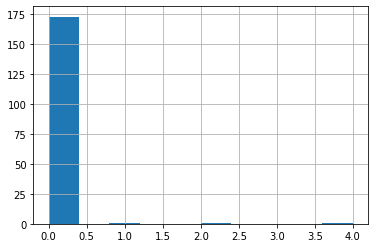

In [19]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count